<a href="https://colab.research.google.com/github/BragatteMAS/Python/blob/master/Research/Disf_Eret_EDAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tibial Nerve Stimulation add on Pelvic Muscle Training for Postprostatectomy Urinary Incontinence 

        Example of Erectile Dysfunction Database
        Data collection carried out by the researcher Fernandes, J.A.

Created by Bragatte 202102061700

# Data

### Libs

In [5]:
#import lib 
import numpy as np
import pandas as pd

In [238]:
#Data with "pandas"
df = pd.read_csv("/content/DB_DE.csv", sep=";")#, index_col=0) #call csv, separate ";" by columns and transform 1 col in index
df.head(3) #viz table as "dataframe" = df(13)

,Group,Group_category,Patient,Continence,Age,Height,Weight,BMI,PSA_pre_ope,Gleason,Volume_prostate,ABS_Diff_Weight_1,ABS_Diff_Weight_2,Dif<8_1,Dif<8_2,ICS_power_1,ICS_cat_1,ICS_power_2,ICS_cat_2,ICS_endurance_1,ICS_endurance_2,OABV8_1,OABV8_2,Hyperactive Bladder 1,Hyperactive Bladder 2,OABV8_rating_1,OABV8_cat_1,OABV8_rating_2,OABV8_cat_2,ICIQ_IU_1,ICIQ_IU_2,ICIQ_continence_1,ICIQ_continence_2,ICIQ_rating_IU_1,ICIQ_cat_1,ICIQ_rating_IU_2,ICIQ_cat_2,ICIQ_QOL_1,ICIQ_QOL_2,Self-Reported Continence 1,Self-Reported Continence 2,IIEF_1,IIEF_2,IIEF_grav_1,IIEF_cat_1,IIEF_grav_2,IIEF_cat_2,EORTC_Global_Health_1,EORTC_Global_Health_2,EORTC_Funcional_1_,EORTC_Funcional_2,EORTC_Symptons_1,EORTC_Symptons_2,Continence_DM__1,Continence_DM__2,Num_Abs/day_1,Num_Abs/day_2,Freq_DM_1,Freq_DM_2,palaci1,palaci2
0,1,control,1,1,67,160,61.9,24.18,8.46,7,50,796.2,160.4,0,0,3,Strong,3,Strong,2,7,8,2,2,2,1,mild,1,mild,6,6,2,2,4,severe,4,severe,6,2,2,2,6,7,4,severe,4,severe,91.67,83.33,66.67,100.00,15.38,7.69,2,2,4,12,1,NaN,NaN,NaN
1,1,control,2,2,74,163,68.5,25.78,5.71,7,54,360.1,122.0,0,0,3,Strong,3,Strong,6,9,17,5,1,2,3,severe,1,mild,8,6,2,2,4,severe,4,severe,7,2,2,2,6,5,4,severe,4,severe,100.00,83.33,66.70,95.56,10.25,0.00,2,2,5,4,11,11.0,1.0,1.0
2,1,control,4,2,60,166,65.7,25.03,6.87,7,40,-100.3,13.6,1,0,3,Strong,3,Strong,8,10,16,4,1,2,2,moderate,1,mild,8,6,2,2,4,severe,4,severe,5,0,2,2,5,6,4,severe,4,severe,66.67,50.00,57.78,82.22,30.77,12.82,2,2,2,1,6,4.0,2.0,2.0


In [250]:
df.describe()

,Group,Patient,Continence,Age,Height,Weight,BMI,PSA_pre_ope,Gleason,Volume_prostate,ABS_Diff_Weight_1,ABS_Diff_Weight_2,Dif<8_1,Dif<8_2,ICS_power_1,ICS_power_2,ICS_endurance_1,ICS_endurance_2,OABV8_1,OABV8_2,Hyperactive Bladder 1,Hyperactive Bladder 2,OABV8_rating_1,OABV8_rating_2,ICIQ_IU_1,ICIQ_IU_2,ICIQ_continence_1,ICIQ_continence_2,ICIQ_rating_IU_1,ICIQ_rating_IU_2,ICIQ_QOL_1,ICIQ_QOL_2,Self-Reported Continence 1,Self-Reported Continence 2,IIEF_1,IIEF_2,IIEF_grav_1,IIEF_grav_2,EORTC_Global_Health_1,EORTC_Global_Health_2,EORTC_Funcional_1_,EORTC_Funcional_2,EORTC_Symptons_1,EORTC_Symptons_2,Continence_DM__1,Continence_DM__2,Num_Abs/day_1,Num_Abs/day_2,Freq_DM_1,Freq_DM_2,palaci1,palaci2
count,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.00000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,11.000000,11.000000,11.000000
mean,1.538462,7.00000,1.692308,64.692308,168.153846,79.476923,28.271538,10.832308,7.0,45.692308,216.800000,89.969231,0.153846,0.307692,2.538462,2.692308,6.076923,8.846154,17.076923,7.153846,1.153846,1.769231,2.230769,1.307692,7.692308,4.846154,2.0,1.923077,4.076923,3.230769,6.00000,5.615385,2.0,1.923077,6.923077,8.692308,3.769231,3.153846,86.539231,85.897692,67.713077,82.567692,18.734615,11.240769,2.0,1.769231,3.461538,3.538462,9.461538,9.272727,1.181818,1.272727
std,0.518875,3.89444,0.480384,6.823789,6.962353,20.921446,6.974755,7.205526,0.0,4.327906,270.487193,113.644984,0.375534,0.480384,0.518875,0.480384,2.564551,2.577019,9.638997,6.780439,0.375534,0.438529,0.725011,0.630425,1.974192,2.115268,0.0,0.277350,0.493548,1.091928,2.54951,3.969435,0.0,0.277350,1.187542,3.092588,0.438529,0.898717,13.410023,13.771487,23.856980,13.014794,16.988261,10.856022,0.0,0.438529,1.713446,4.254711,4.665751,3.635682,0.404520,0.467099
min,1.000000,1.00000,1.000000,52.000000,160.000000,52.100000,19.610000,3.810000,7.0,40.000000,-100.300000,0.200000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,2.0,1.000000,3.000000,1.000000,2.00000,0.000000,2.0,1.000000,5.000000,5.000000,3.000000,2.000000,66.670000,50.000000,26.770000,51.110000,0.000000,0.000000,2.0,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000
25%,1.000000,4.00000,1.000000,60.000000,163.000000,64.200000,23.580000,5.710000,7.0,45.000000,17.400000,7.200000,0.000000,0.000000,2.000000,2.000000,4.000000,7.000000,11.000000,5.000000,1.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.0,2.000000,4.000000,2.000000,5.00000,2.000000,2.0,2.000000,6.000000,7.000000,4.000000,2.000000,75.000000,83.330000,57.780000,75.600000,5.130000,5.130000,2.0,2.000000,2.000000,1.000000,7.000000,7.500000,1.000000,1.000000
50%,2.000000,7.00000,2.000000,67.000000,166.000000,70.000000,25.710000,8.460000,7.0,45.000000,110.100000,27.000000,0.000000,0.000000,3.000000,3.000000,6.000000,9.000000,16.000000,6.000000,1.000000,2.000000,2.000000,1.000000,8.000000,6.000000,2.0,2.000000,4.000000,4.000000,6.00000,7.000000,2.0,2.000000,7.000000,8.000000,4.000000,3.000000,91.670000,91.670000,71.200000,86.670000,12.820000,7.690000,2.0,2.000000,4.000000,2.000000,10.000000,9.000000,1.000000,1.000000
75%,2.000000,10.00000,2.000000,70.000000,174.000000,97.900000,33.230000,14.710000,7.0,50.000000,360.100000,160.000000,0.000000,1.000000,3.000000,3.000000,8.000000,10.000000,21.000000,7.000000,1.000000,2.000000,3.000000,1.000000,8.000000,6.000000,2.0,2.000000,4.000000,4.000000,8.00000,10.000000,2.0,2.000000,7.000000,11.000000,4.000000,4.000000,100.000000,91.670000,86.670000,91.110000,30.770000,10.260000,2.0,2.000000,5.000000,4.000000,12.000000,10.500000,1.000000,1.500000
ma

#Plot Results

In [240]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

## Fig2 Group vs Patients


In [241]:
#Group vs Patients
import plotly.express as px
fig = px.histogram(df,
             x="Group_category",
             y="Group",
             color="Group",
             template="simple_white",
             )
#Grid
fig.update_yaxes( showgrid=True
)
#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0
))

fig.show()

## Fig3 leak diff < 8

In [242]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#class for Pad Test result
labels =["Loss of 8 gm or less", "No leak"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group 1 Control 
## Sum by true or false categories for Dif<8
preDiff8_values=df.query("Group=='1'")['Dif<8_1'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=preDiff8_values, 
             pull=[0, 0.1],
             ),1,1)

posDiff8_values=df.query("Group=='1'")['Dif<8_2'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=posDiff8_values,
             pull=[0, 0.1],
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#E6F4F1", '#Add8e6']# ,"#B6ECFF" ##E8FDFF]
                  )

fig.update_layout(
    title_text="Differences in the amount of urine leakage at Pad test<br> Control Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.188, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.805, y=0.5, font_size=19, showarrow=False)],
                 #legend={'traceorder':'reversed+grouped'},
                 )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.36
))

fig.show()

In [243]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#class for Pad Test result
labels =["Loss of 8 gm or less", "No leak"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group 2 Intervention 
## Sum by true or false categories for Dif<8
preDiff8_values=df.query("Group=='2'")['Dif<8_1'].astype('category').value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=preDiff8_values, 
             pull=[0, 0.1],
             ),1,1)

posDiff8_values=df.query("Group=='2'")['Dif<8_2'].astype('category').value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=posDiff8_values,
             pull=[0, 0.1],
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#FFCC90",'#FFECCC']
                  )

fig.update_layout(
    title_text="Differences in the amount of urine leakage at Pad test<br>Intervention Group",
    title_x=0.5,    
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.195, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.813, y=0.5, font_size=19, showarrow=False)],
                 #legend={'traceorder':'reversed+grouped'},
                 )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.36
))

fig.show()

## Fig 4 ICIQ-SF

In [251]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#labels =["Continence","Mild", "Moderate", "Severe", "Very Severe"]
#colors=["ADD8E6","lightblue", "#459AB8" ,"#2F77B4","#2B05FA"]
labels =["Mild", "Severe", "Very Severe"]
colors=["lightblue","#2F77B4","#2B05FA"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group1 Control
preICIQ_labels=df.query("Group=='1'")['ICIQ_cat_1'].sort_index(ascending=False)
preICIQ_values=df.query("Group=='1'")['ICIQ_rating_IU_1'].sort_index(ascending=False)
#preICIQ=[0,0,0,5,1]
preICIQ=[0,5,1]

fig.add_trace(go.Pie(labels=labels,
                     values=preICIQ,
                     pull=[0, 0.1, 0],
                     ),1,1)

posICIQ_labels=df.query("Group=='2'")['ICIQ_cat_1']
posICIQ_values=df.query("Group=='2'")['ICIQ_rating_IU_1']#.value_counts()
#posICIQ=[0,1,0,5,0]
posICIQ=[1,5,1]


fig.add_trace(go.Pie(labels=labels,
                     values=posICIQ,
                     pull=[0, 0.1, 0],
                     ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker=dict(colors=colors),
                  sort=False
                  )

fig.update_layout(
    title_text="International Consultation on Incontinence Questionnaire - <br>  Urinary Incontinence - Short Form (ICIQ-UI-SF) <br> Control Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.19, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.795, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed+grouped'},
                 )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.4
))

fig.show()

In [252]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

level_sev =["Continence","Mild", "Moderate", "Severe", "Very Severe"]
colors=["#FFCC90","#F38E19","#F2661A","#F1450C","#EB2600"] 

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    )

#Group1 Control
preICIQ_labels=df.query("Group=='1'")['ICIQ_cat_2'].astype('category').value_counts()
preICIQ=[0,0,1,5,1]

fig.add_trace(go.Pie(labels=level_sev,
                     values=preICIQ,
                     pull=[0, 0, 0, 0.1, 0],
                     )
                     ,1,1)
#Group2 Intervention

posICIQ_labels=df.query("Group=='2'")['ICIQ_cat_2'].value_counts().sort_index(ascending=True)
posICIQ=[1,2,1,3,0]

fig.add_trace(go.Pie(labels=level_sev,
                     values=posICIQ,
                     pull=[0, 0, 0, 0.1, 0],
                     ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker=dict(colors=colors),
                  sort=False
                  )

fig.update_layout(
    title_text="International Consultation on Incontinence Questionnaire - <br>  Urinary Incontinence - Short Form (ICIQ-UI-SF) <br> Intervention Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.19, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.81, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed+grouped'},
                 )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.4
))

fig.show()

## Fig5 Global Health

In [347]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name='Pre',
    y=df['EORTC_Global_Health_1'],
    marker_color='#2F77B4',
    mode='lines+markers',
    opacity=1,
    
))
fig.add_trace(go.Scatter(
    name='Pos',
    y=df['EORTC_Global_Health_2'],
    marker_color='#F1450C',
    mode='lines+markers',
    opacity=1
))

fig.update_layout(
    barmode="overlay",
    bargap=0.1,
    template="simple_white",
    title_text="The European Organization for Research and Treatment of Cancer<br>EORTC Global Health",
    title_x=0.5,
)

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="auto",
    y=0.39,
    xanchor="auto",
    x=0.55
))
fig.show()

In [341]:
import plotly.express as px

fig = go.Figure()
#Group1
#mean
preEORTCm=df.query("Group=='1'")["EORTC_Global_Health_1"].mean()
posEORTCm=df.query("Group=='1'")["EORTC_Global_Health_2"].mean()
#std
preEORTCstd=df.query("Group=='1'")["EORTC_Global_Health_1"].std()
posEORTCstd=df.query("Group=='1'")["EORTC_Global_Health_2"].std()
#values
preEORTC_values=df.query("Group=='1'")["EORTC_Global_Health_1"]
posEORTC_values=df.query("Group=='1'")["EORTC_Global_Health_2"]
#Group2
#mean
preEORTCm2=df.query("Group=='2'")["EORTC_Global_Health_1"].mean()
posEORTCm2=df.query("Group=='2'")["EORTC_Global_Health_2"].mean()
#std
preEORTCstd2=df.query("Group=='2'")["EORTC_Global_Health_1"].std()
posEORTCstd2=df.query("Group=='2'")["EORTC_Global_Health_2"].std()
#values
preEORTC2_values=df.query("Group=='2'")["EORTC_Global_Health_1"]
posEORTC2_values=df.query("Group=='2'")["EORTC_Global_Health_2"]

#separated groups
Group1=df.query("Group=='1'")["Group_category"]
Group2=df.query("Group=='2'")["Group_category"]

#Violin+Box
fig = px.violin(df,
             x=df['Group_category'],
             y=df["EORTC_Global_Health_2"],
             color=df['Group_category'],
             box=True,
             points='all',
             hover_data=df.columns,
             violinmode='overlay',
             color_discrete_map={"control": "#2F77B4", "intervention": "#F1450C"},
             template="simple_white",
             )

fig.update_traces(meanline_visible=True,
                  jitter=0.6,
                  scalemode='count',
                  #marker_color=["#2F77B4","#F1450C"],
                 )

fig.add_annotation( # add a text callout with arrow
    text="Disfavorably <br> -11.1",
    x="control",
    y=12,
    font_size=16,
    arrowhead=1,
    showarrow=True
)
fig.add_annotation( # add a text callout with arrow
    text="Favorably <br> 12.5",
    x="intervention",
    y=12,
    font_size=16,
    arrowhead=1,
    showarrow=True
)

fig.update_layout(
    title_text="The European Organization for Research and Treatment of Cancer<br>EORTC Global Health",
    title_x=0.5,
)

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="auto",
    y=0.99,
    xanchor="auto",
    x=0.49
))
fig.show()

## Fig6 OAB-V8

In [253]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Mild", "Moderate", "Severe"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group1 Control compare OABV8
preOAB1_labels=df.query("Group=='1'")['OABV8_cat_1']
preOAB1_values=df.query("Group=='1'")['OABV8_rating_1'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=preOAB1_values, 
             pull=[0, 0, 0.1]
             ),1,1)

posOAB1_labels=df.query("Group=='1'")['OABV8_cat_2']
posOAB1_values=df.query("Group=='1'")['OABV8_rating_2'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=posOAB1_values,
             pull=[0, 0, 0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["lightblue", "#459AB8" ,"#2F77B4"],
                  sort=False)

fig.update_layout(
    title_text="Overactive Bladder Awareness (OAB-V8) symptoms <br>Control Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.195, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.807, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed'})

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.41
))

fig.show()

In [254]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Mild", "Moderate", "Severe"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group2 Inteervention compare OABV8
preOAB2_labels=df.query("Group=='2'")['OABV8_cat_1']
preOAB2_values=df.query("Group=='2'")['OABV8_rating_1'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=preOAB2_values, 
             pull=[0, 0, 0.1]
             ),1,1)

posOAB2_labels=df.query("Group=='2'")['OABV8_cat_2']
posOAB2_values=df.query("Group=='2'")['OABV8_rating_2'].value_counts().sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=posOAB2_values,
             pull=[0, 0, 0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#F38E19","#F2661A","#F1450C"],
                  sort=False) 

fig.update_layout(
    title_text="Overactive Bladder Awareness (OAB-V8) symptoms <br>Intervention Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.194, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.805, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed'})

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.41
))
fig.show()

## Fig7 IIEF5

In [264]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Severe", "Moderate", "Low to Moderate"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

#Group1 Control compare IIEF
##Pre
preIIEF_labels=df.query("Group=='1'")['IIEF_cat_1']
preIIEF_values=df.query("Group=='1'")['IIEF_cat_1'].value_counts()#.sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=preIIEF_values, 
             
             ),1,1)
##Pos
posIIEF_labels=df.query("Group=='1'")['IIEF_cat_2']
posIIEF_values=df.query("Group=='1'")['IIEF_cat_2'].value_counts()#.sort_index()

fig.add_trace(go.Pie(labels=labels,
             values=posIIEF_values,
             pull=[0,0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#2F77B4","#459AB8","lightblue"],
                  sort=True) 

fig.update_layout(
    title_text="International Index of Erectile Function (IIEF5) symptoms <br>Control Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.194, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.805, y=0.5, font_size=19, showarrow=False)],
                 #legend={'traceorder':'reversed'})
                )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.41
))
fig.show()

In [265]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Severe", "Moderate", "Low to Moderate"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]]
                    )

#Group2 Intervention compare IIEF
##Pre
preIIEF_labels=df.query("Group=='2'")['IIEF_cat_1']
preIIEF_values=df.query("Group=='2'")['IIEF_cat_1'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=preIIEF_values, 
             pull=[0,0.1]
             ),1,1)
##Pos
posIIEF_labels=df.query("Group=='2'")['IIEF_cat_2']
posIIEF_values=df.query("Group=='2'")['IIEF_cat_2'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=posIIEF_values,
             pull=[0,0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#F1450C","#F2661A","#F38E19"],
                  sort=True) 

fig.update_layout(
    title_text="International Index of Erectile Function (IIEF5) symptoms <br>Intervention Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.194, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.805, y=0.5, font_size=19, showarrow=False)],
                 #legend={'traceorder':'reversed'})
                )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.38
))
fig.show()

## Fig8

### Fig8.1 **ICS_Strong**

In [273]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Normal","Strong strength","Weak","Absent"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]]
                    )

#Group1 Control compare IIEF
##Pre
preICS_labels=df.query("Group=='1'")['ICS_cat_1']
preICS_values=df.query("Group=='1'")['ICS_cat_1'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=preICS_values, 
             pull=[0,0.1]
             ),1,1)
##Pos
posICS_labels=df.query("Group=='1'")['ICS_cat_2']
posICS_values=df.query("Group=='1'")['ICS_cat_2'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=posICS_values,
             pull=[0,0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["Lightblue","#2F77B4"],
                  sort=True) 

fig.update_layout(
    title_text="International Continence Society (ICS) level <br>Control Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.188, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.805, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed'}
                )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.4
))
fig.show()

In [274]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels =["Normal","Strong strength","Weak","Absent"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]]
                    )

#Group2 Intervention compare IIEF
##Pre
preICS_labels=df.query("Group=='2'")['ICS_cat_1']
preICS_values=df.query("Group=='2'")['ICS_cat_1'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=preICS_values, 
             pull=[0,0.1]
             ),1,1)
##Pos
posICS_labels=df.query("Group=='2'")['ICS_cat_2']
posICS_values=df.query("Group=='2'")['ICS_cat_2'].value_counts()

fig.add_trace(go.Pie(labels=labels,
             values=posICS_values,
             pull=[0,0.1]
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  marker_colors=["#F38E19","#F1450C"],
                  sort=True) 

fig.update_layout(
    title_text="International Continence Society (ICS strength) level <br>Intervention Group",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pre', x=0.188, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos', x=0.80, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed'}
                )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.4
))
fig.show()

In [275]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

label_pos1 =["Normal_control"]
label_pos2 =["Normal_intervention","Strong strength","Weak","Absent"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]]
                    )

#Group1 Control compare ICS
##PoS
preICS_labels=df.query("Group=='1'")['ICS_cat_2']
preICS_values=df.query("Group=='1'")['ICS_cat_2'].value_counts()

fig.add_trace(go.Pie(labels=label_pos1,
             values=preICS_values, 
             pull=[0,0.1],
             marker_colors=["Lightblue","#2F77B4"],
             ),1,1)
#Group2 Intervention compare ICS
##Pos 
posICS_labels=df.query("Group=='2'")['ICS_cat_2']
posICS_values=df.query("Group=='2'")['ICS_cat_2'].value_counts()

fig.add_trace(go.Pie(labels=label_pos2,
             values=posICS_values,
             pull=[0,0.1],
             marker_colors=["#F38E19","#F1450C"],
             ),1,2)
             
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="percent+label",
                  
                  sort=True) 

fig.update_layout(
    title_text="International Continence Society (ICS strength) level <br> Control vs Intervention",
    title_x=0.5,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Pos<br>Control', x=0.16, y=0.5, font_size=19, showarrow=False),
                 dict(text='Pos<br>Intervention', x=0.87, y=0.5, font_size=19, showarrow=False)],
                 legend={'traceorder':'reversed'}
                )

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.35
))
fig.show()

### Fig8.2 **ICS Endurance**

In [276]:
df.columns

Index(['Group', 'Group_category', 'Patient', 'Continence', 'Age', 'Height',
       'Weight', 'BMI', 'PSA_pre_ope', 'Gleason', 'Volume_prostate',
       'ABS_Diff_Weight_1', 'ABS_Diff_Weight_2', 'Dif<8_1', 'Dif<8_2',
       'ICS_power_1', 'ICS_cat_1', 'ICS_power_2', 'ICS_cat_2',
       'ICS_endurance_1', 'ICS_endurance_2', 'OABV8_1', 'OABV8_2',
       'Hyperactive Bladder 1', 'Hyperactive Bladder 2', 'OABV8_rating_1',
       'OABV8_cat_1', 'OABV8_rating_2', 'OABV8_cat_2', 'ICIQ_IU_1',
       'ICIQ_IU_2', 'ICIQ_continence_1', 'ICIQ_continence_2',
       'ICIQ_rating_IU_1', 'ICIQ_cat_1', 'ICIQ_rating_IU_2', 'ICIQ_cat_2',
       'ICIQ_QOL_1', 'ICIQ_QOL_2', 'Self-Reported Continence 1',
       'Self-Reported Continence 2', 'IIEF_1', 'IIEF_2', 'IIEF_grav_1',
       'IIEF_cat_1', 'IIEF_grav_2', 'IIEF_cat_2', 'EORTC_Global_Health_1',
       'EORTC_Global_Health_2', 'EORTC_Funcional_1_', 'EORTC_Funcional_2',
       'EORTC_Symptons_1', 'EORTC_Symptons_2', 'Continence_DM__1',
       'Continence_D

In [277]:
df.describe()

,Group,Patient,Continence,Age,Height,Weight,BMI,PSA_pre_ope,Gleason,Volume_prostate,ABS_Diff_Weight_1,ABS_Diff_Weight_2,Dif<8_1,Dif<8_2,ICS_power_1,ICS_power_2,ICS_endurance_1,ICS_endurance_2,OABV8_1,OABV8_2,Hyperactive Bladder 1,Hyperactive Bladder 2,OABV8_rating_1,OABV8_rating_2,ICIQ_IU_1,ICIQ_IU_2,ICIQ_continence_1,ICIQ_continence_2,ICIQ_rating_IU_1,ICIQ_rating_IU_2,ICIQ_QOL_1,ICIQ_QOL_2,Self-Reported Continence 1,Self-Reported Continence 2,IIEF_1,IIEF_2,IIEF_grav_1,IIEF_grav_2,EORTC_Global_Health_1,EORTC_Global_Health_2,EORTC_Funcional_1_,EORTC_Funcional_2,EORTC_Symptons_1,EORTC_Symptons_2,Continence_DM__1,Continence_DM__2,Num_Abs/day_1,Num_Abs/day_2,Freq_DM_1,Freq_DM_2,palaci1,palaci2
count,13.000000,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.00000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,11.000000,11.000000,11.000000
mean,1.538462,7.00000,1.692308,64.692308,168.153846,79.476923,28.271538,10.832308,7.0,45.692308,216.800000,89.969231,0.153846,0.307692,2.538462,2.692308,6.076923,8.846154,17.076923,7.153846,1.153846,1.769231,2.230769,1.307692,7.692308,4.846154,2.0,1.923077,4.076923,3.230769,6.00000,5.615385,2.0,1.923077,6.923077,8.692308,3.769231,3.153846,86.539231,85.897692,67.713077,82.567692,18.734615,11.240769,2.0,1.769231,3.461538,3.538462,9.461538,9.272727,1.181818,1.272727
std,0.518875,3.89444,0.480384,6.823789,6.962353,20.921446,6.974755,7.205526,0.0,4.327906,270.487193,113.644984,0.375534,0.480384,0.518875,0.480384,2.564551,2.577019,9.638997,6.780439,0.375534,0.438529,0.725011,0.630425,1.974192,2.115268,0.0,0.277350,0.493548,1.091928,2.54951,3.969435,0.0,0.277350,1.187542,3.092588,0.438529,0.898717,13.410023,13.771487,23.856980,13.014794,16.988261,10.856022,0.0,0.438529,1.713446,4.254711,4.665751,3.635682,0.404520,0.467099
min,1.000000,1.00000,1.000000,52.000000,160.000000,52.100000,19.610000,3.810000,7.0,40.000000,-100.300000,0.200000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,2.0,1.000000,3.000000,1.000000,2.00000,0.000000,2.0,1.000000,5.000000,5.000000,3.000000,2.000000,66.670000,50.000000,26.770000,51.110000,0.000000,0.000000,2.0,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000
25%,1.000000,4.00000,1.000000,60.000000,163.000000,64.200000,23.580000,5.710000,7.0,45.000000,17.400000,7.200000,0.000000,0.000000,2.000000,2.000000,4.000000,7.000000,11.000000,5.000000,1.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.0,2.000000,4.000000,2.000000,5.00000,2.000000,2.0,2.000000,6.000000,7.000000,4.000000,2.000000,75.000000,83.330000,57.780000,75.600000,5.130000,5.130000,2.0,2.000000,2.000000,1.000000,7.000000,7.500000,1.000000,1.000000
50%,2.000000,7.00000,2.000000,67.000000,166.000000,70.000000,25.710000,8.460000,7.0,45.000000,110.100000,27.000000,0.000000,0.000000,3.000000,3.000000,6.000000,9.000000,16.000000,6.000000,1.000000,2.000000,2.000000,1.000000,8.000000,6.000000,2.0,2.000000,4.000000,4.000000,6.00000,7.000000,2.0,2.000000,7.000000,8.000000,4.000000,3.000000,91.670000,91.670000,71.200000,86.670000,12.820000,7.690000,2.0,2.000000,4.000000,2.000000,10.000000,9.000000,1.000000,1.000000
75%,2.000000,10.00000,2.000000,70.000000,174.000000,97.900000,33.230000,14.710000,7.0,50.000000,360.100000,160.000000,0.000000,1.000000,3.000000,3.000000,8.000000,10.000000,21.000000,7.000000,1.000000,2.000000,3.000000,1.000000,8.000000,6.000000,2.0,2.000000,4.000000,4.000000,8.00000,10.000000,2.0,2.000000,7.000000,11.000000,4.000000,4.000000,100.000000,91.670000,86.670000,91.110000,30.770000,10.260000,2.0,2.000000,5.000000,4.000000,12.000000,10.500000,1.000000,1.500000
ma

In [278]:
print(f"Values from ICS endurance group 2 Intervention are:{posICSend2}.")
print(f"Mean of ICS endurance group 2 Intervention are:{posICSend2m}.")
print(f"Standard Deviation of ICS endurance group 2 Intervention are:{posICSend2std}.")

Values from ICS endurance group 2 Intervention are:6      5
7      9
8     10
9      7
10    10
11    10
12     5
Name: ICS_endurance_2, dtype: int64.
Mean of ICS endurance group 2 Intervention are:8.0.
Standard Deviation of ICS endurance group 2 Intervention are:2.309401076758503.


In [279]:
import plotly.express as px

fig = go.Figure()

#mean
posICSend1m=df.query("Group=='1'")["ICS_endurance_2"].mean()
posICSend2m=df.query("Group=='2'")["ICS_endurance_2"].mean()
#mean
posICSend1std=df.query("Group=='1'")["ICS_endurance_2"].std()
posICSend2std=df.query("Group=='2'")["ICS_endurance_2"].std()
#values
posICSend1=df.query("Group=='1'")["ICS_endurance_2"]
posICSend2=df.query("Group=='2'")["ICS_endurance_2"]
#separated groups
Group1=df.query("Group=='1'")["Group_category"]
Group2=df.query("Group=='2'")["Group_category"]

#Violin+Box
fig = px.violin(df,
             x=df['Group_category'],
             y=df["ICS_endurance_2"],
             color=df['Group_category'],
             box=True,
             points='all',
             hover_data=df.columns,
             violinmode='overlay',
             color_discrete_map={"control": "#2F77B4", "intervention": "#F1450C"},
             )

fig.update_traces(meanline_visible=True,
                  jitter=0.6,
                  scalemode='count',
                  #marker_color=["#2F77B4","#F1450C"],
                 )

fig.add_annotation( # add a text callout with arrow
    text="Mean 9.83",
    x="control",
    y=9.83,
    font_size=19,
    arrowhead=5,
    showarrow=True
)
fig.add_annotation( # add a text callout with arrow
    text="Mean 8.00",
    x="intervention",
    y=8,
    font_size=19,
    arrowhead=5,
    showarrow=True
)

fig.update_layout(
    title_text="International Continence Society (ICS endurance) <br> Control vs Intervention",
    title_x=0.5,
)

#Legend inside plot
fig.update_layout(legend=dict(
    yanchor="auto",
    y=0.99,
    xanchor="auto",
    x=0.5
))
fig.show()

# Research

## EDA's

### Pandas Profile

Pandas profiling is an open-source python library that automates the EDA process and creates a detailed report. Pandas Profiling can be used easily for large datasets as it is blazingly fast and creates reports in a few seconds.

In [ ]:
#Update library
!pip install pandas_profiling --upgrade

In [ ]:
#import "ProfileReport" & "pandas_profiling"
from pandas_profiling import ProfileReport

In [ ]:
#data & exploratory analyses
profile = ProfileReport(df, title="Pandas Profiling Report Disf_Eret", explorative=True) #html={'style': {'full_width': True}}

In [ ]:
profile.to_file("Report_PandasProfile_Disf_Eret.html") #exportar como página da internet os resultados

widget works at jupyter note/lab

`profile.to_widgets()`

Alternative to make widget work in COLAB

```
profile.to_notebook_iframe()
```



In [ ]:
#Viz EDA
profile 

###  SweetViz

Sweetviz is an open-source python auto-visualization library that generates a report, exploring the data with the help of high-density plots. It not only automates the EDA but is also used for comparing datasets and drawing inferences from it. A comparison of two datasets can be done by treating one as training and the other as testing.

In [ ]:
#Install packs
!pip install sweetviz

In [ ]:
# import sweetviz
import sweetviz as sv

In [ ]:
#analysing data
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


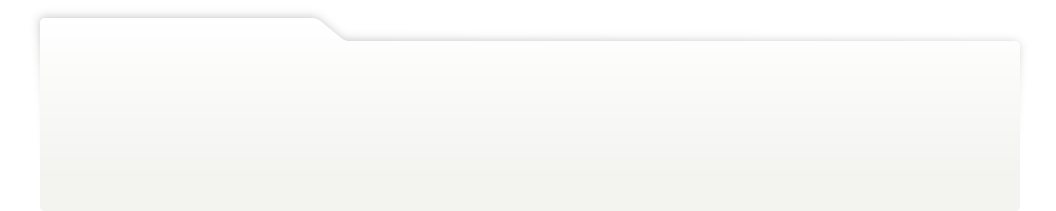
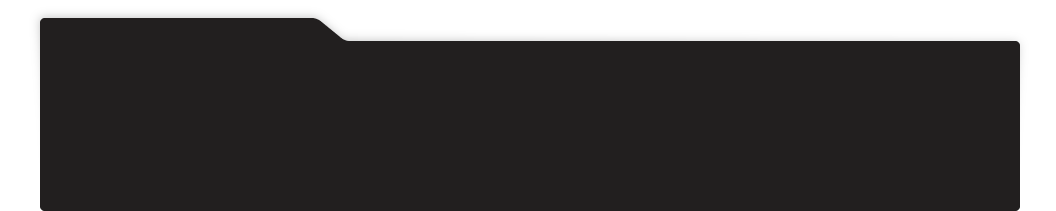
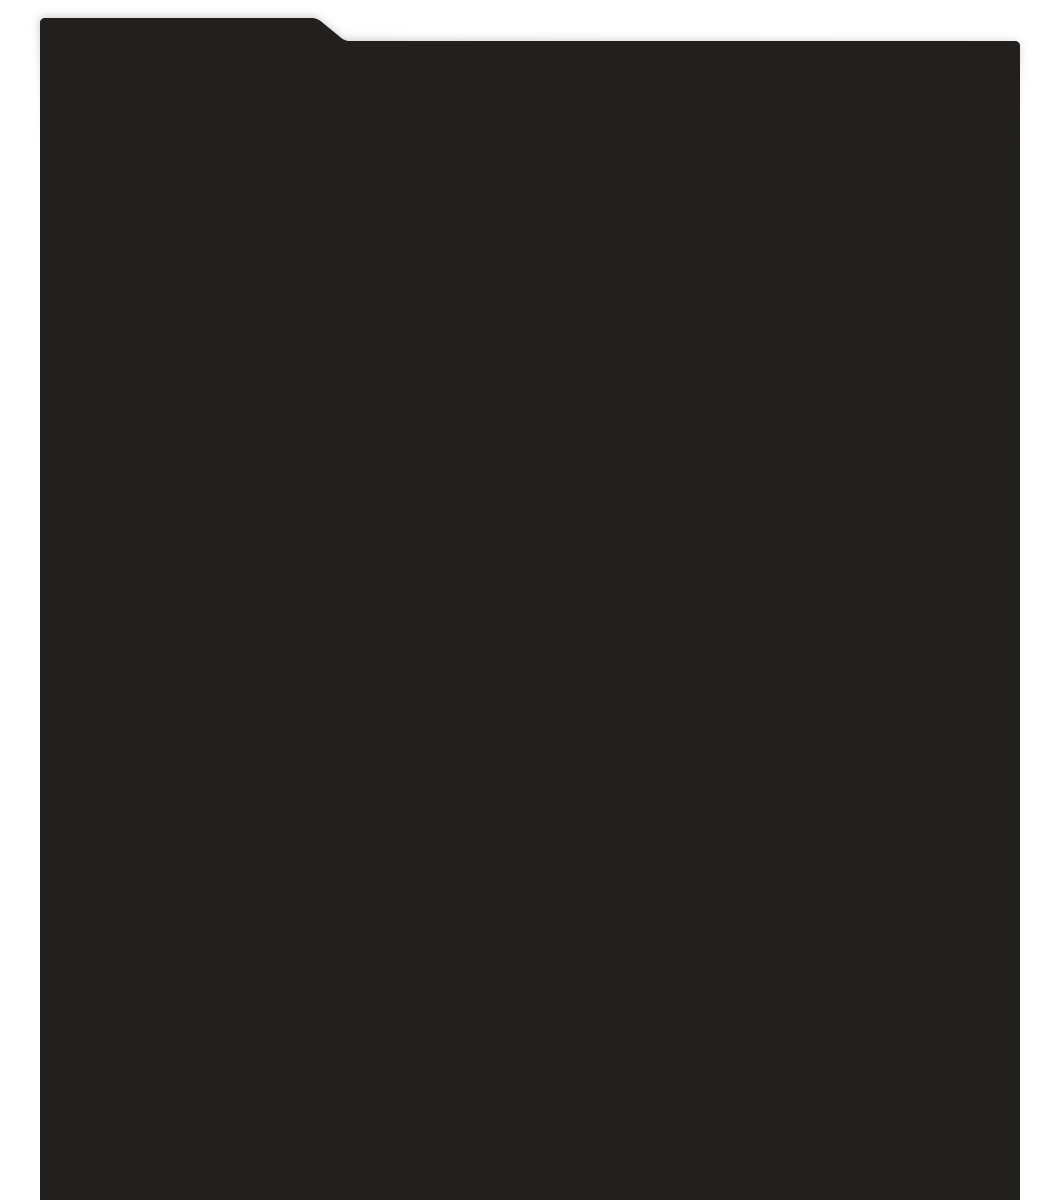
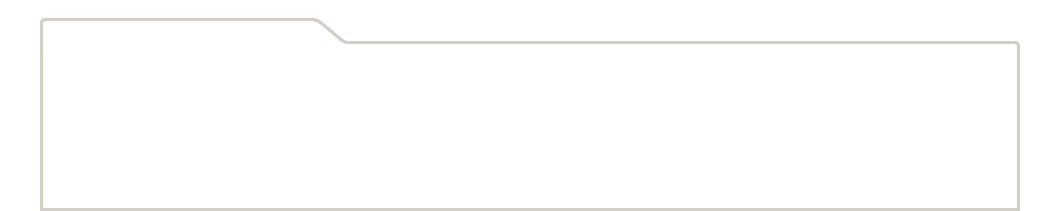
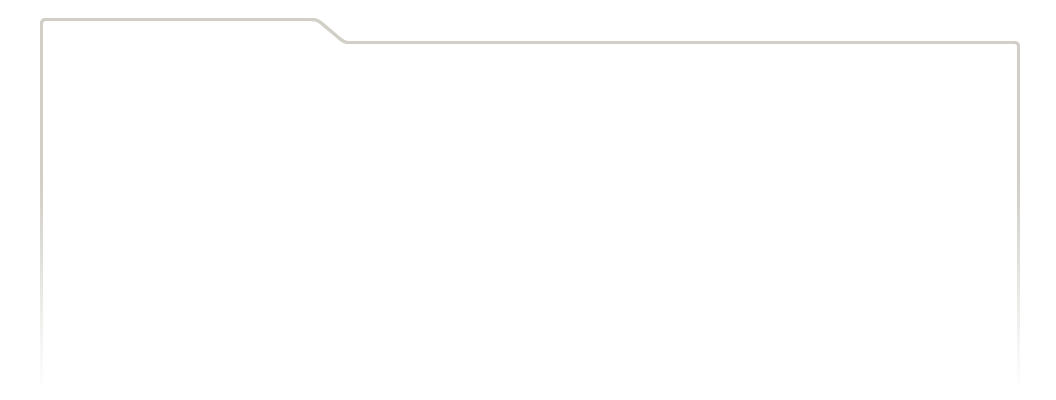
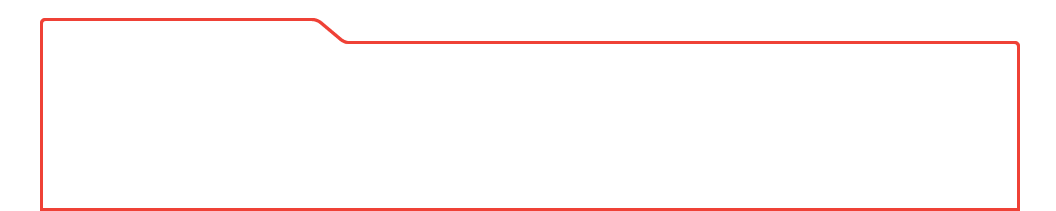
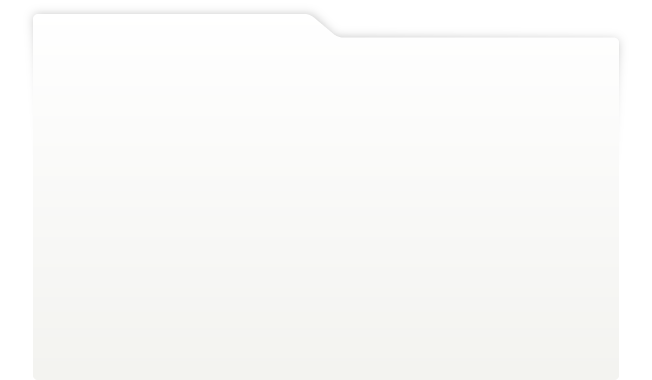
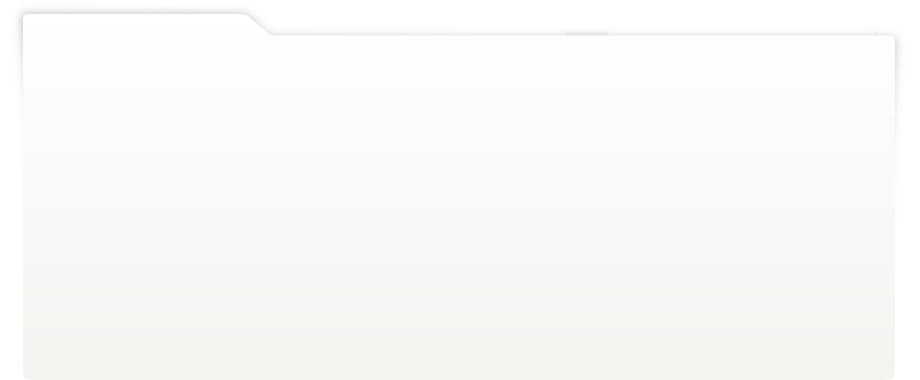
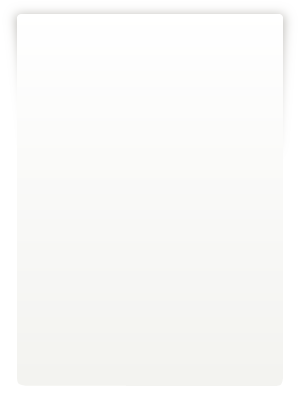
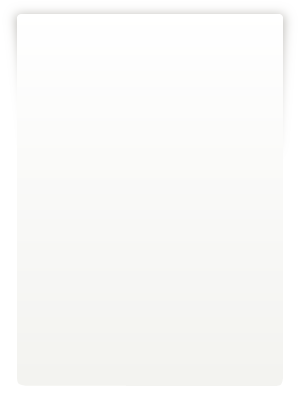
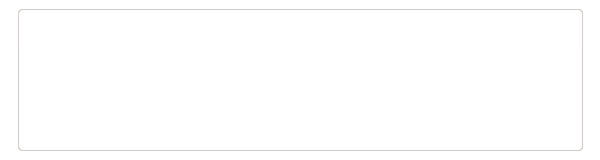
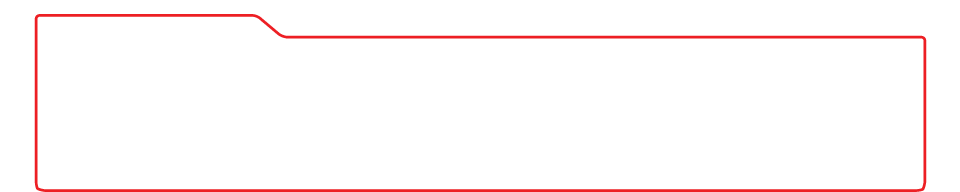
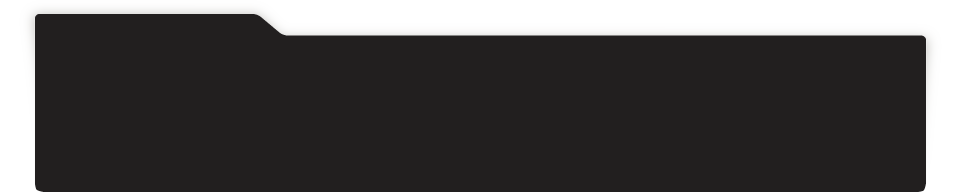
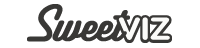
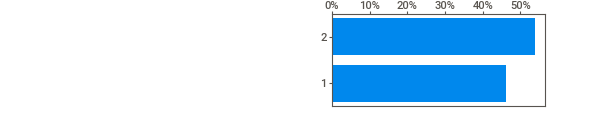
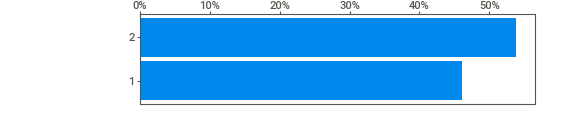
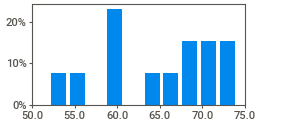
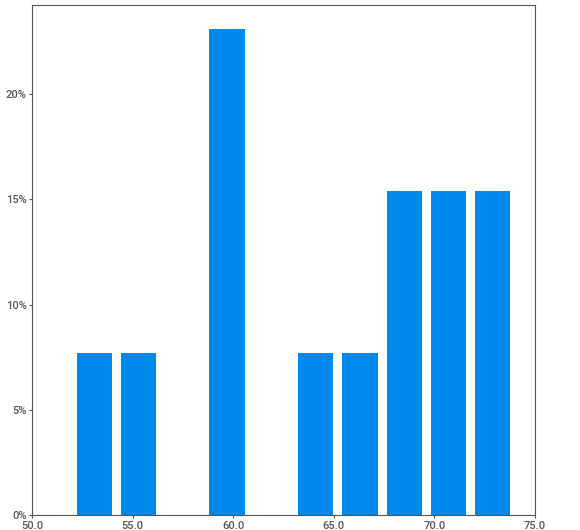
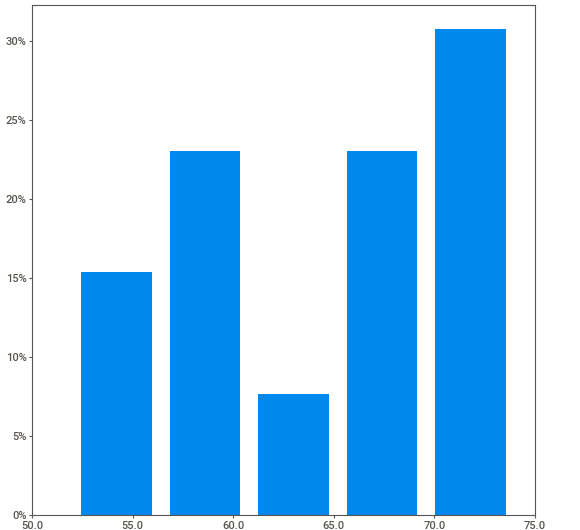
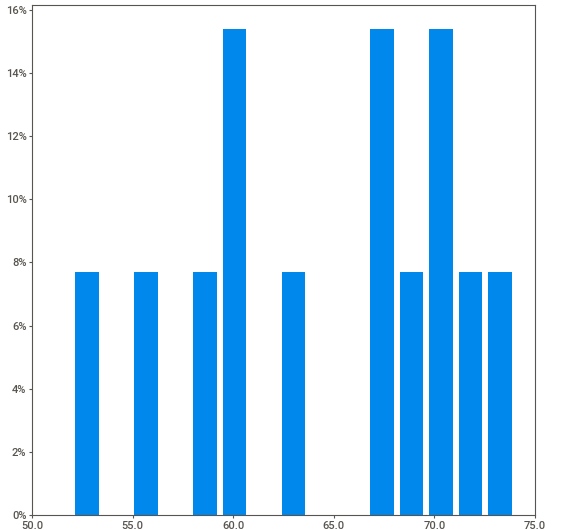
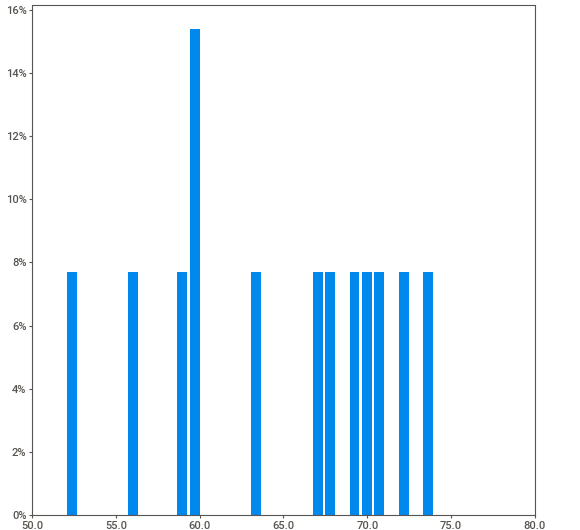
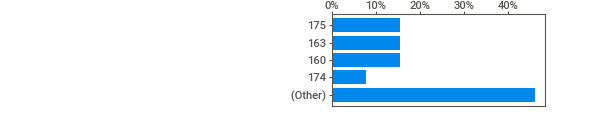
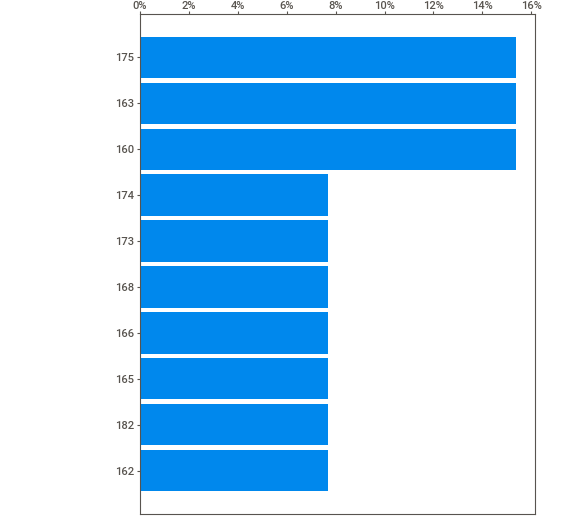
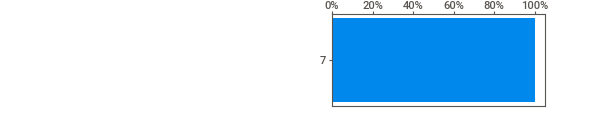
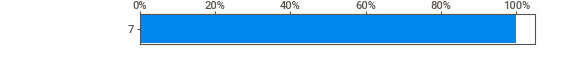
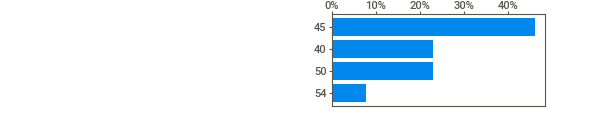
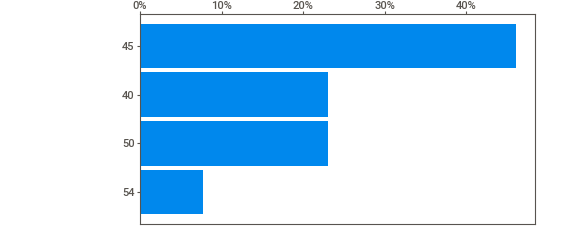
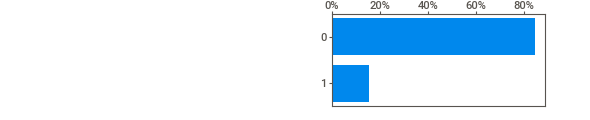
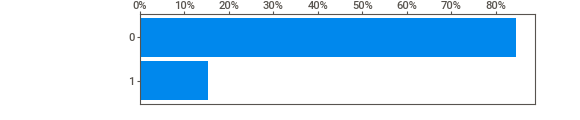
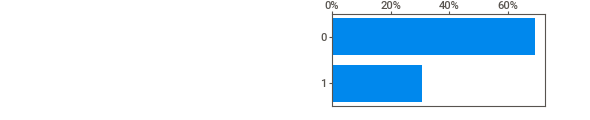
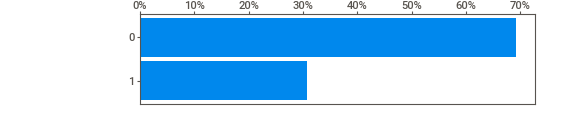
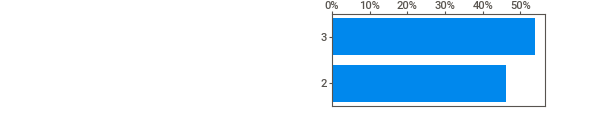
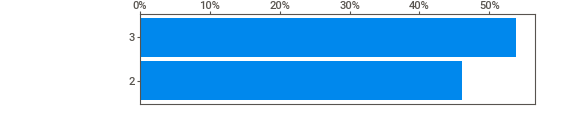
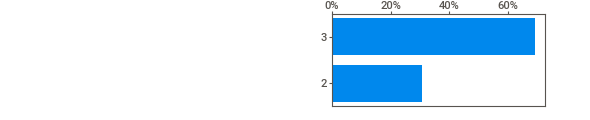
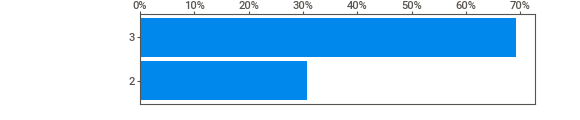
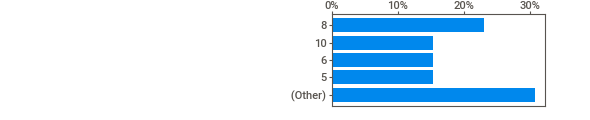
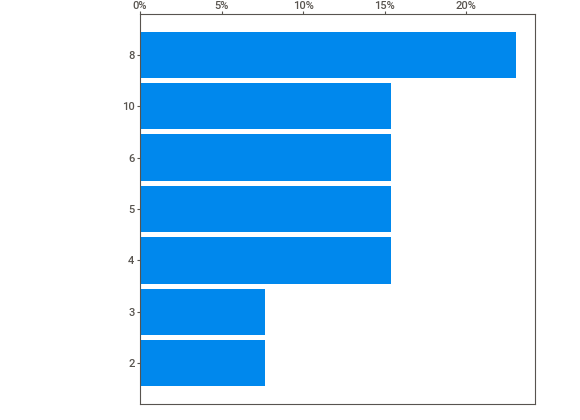
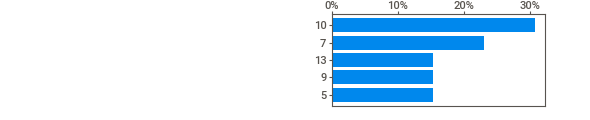
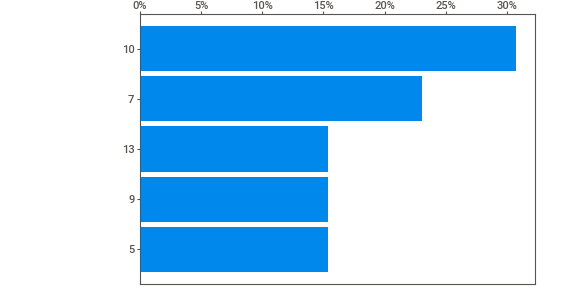
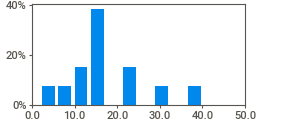
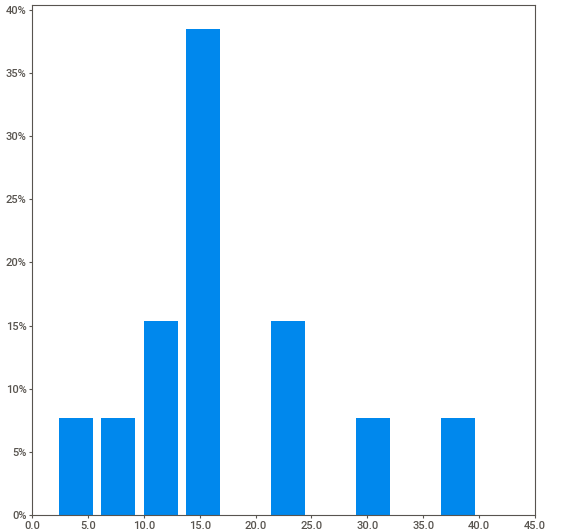
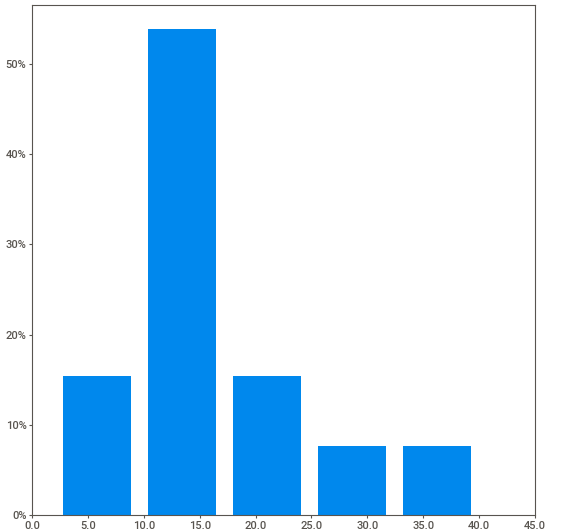
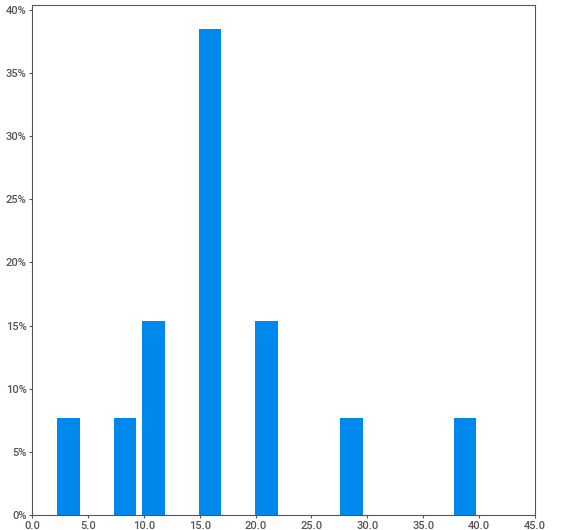
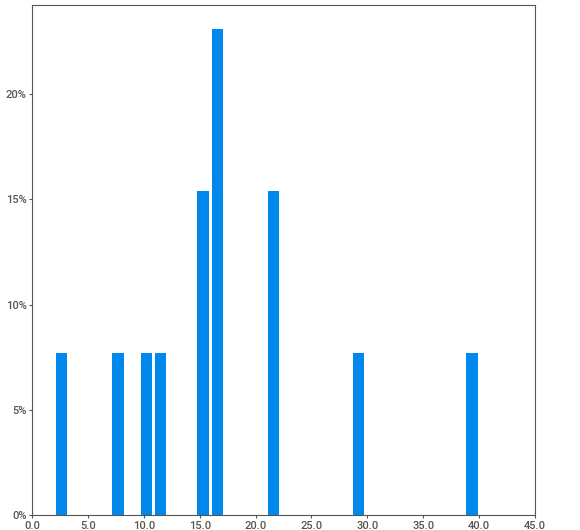
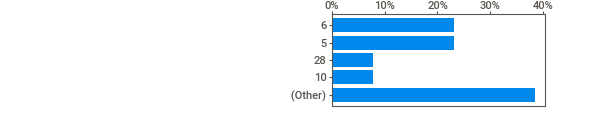
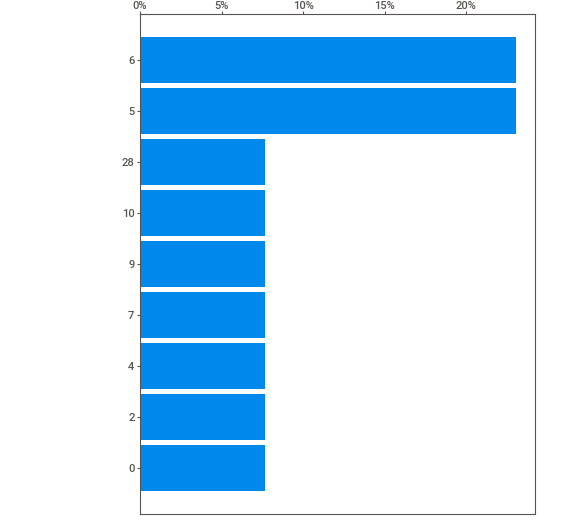
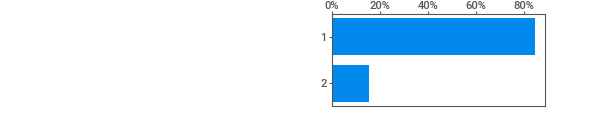
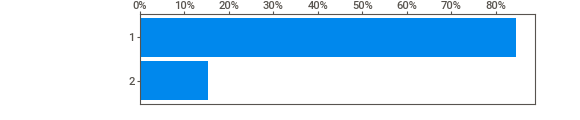
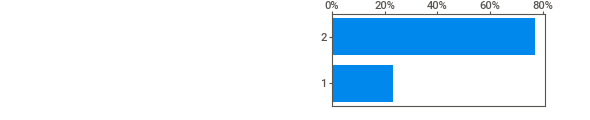
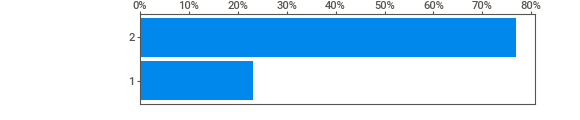
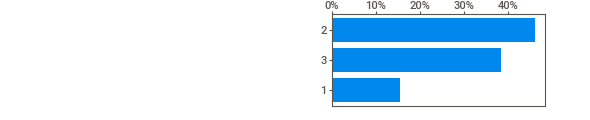
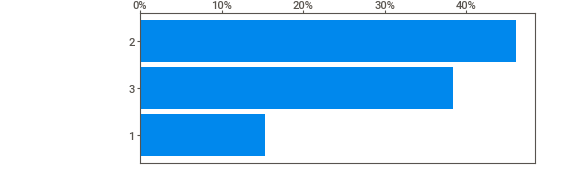
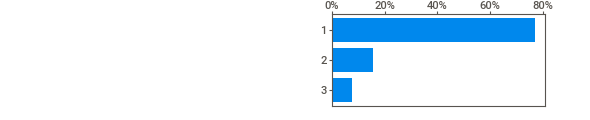
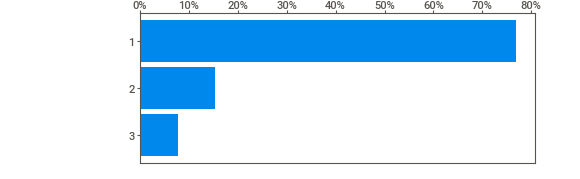
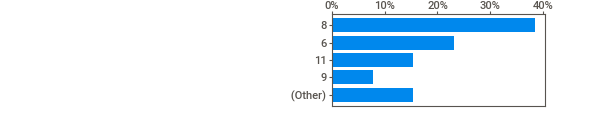
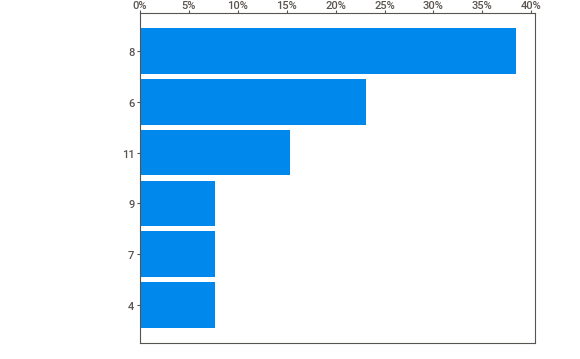
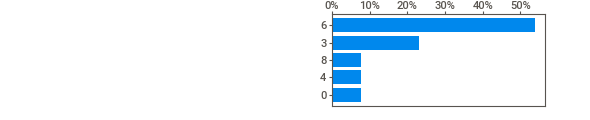
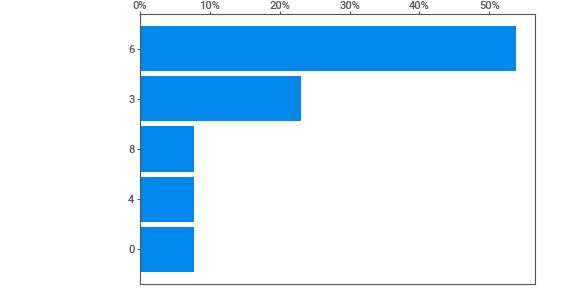
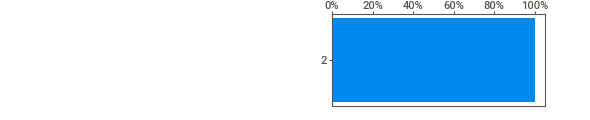
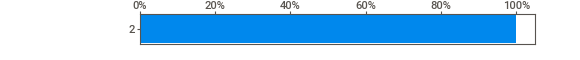
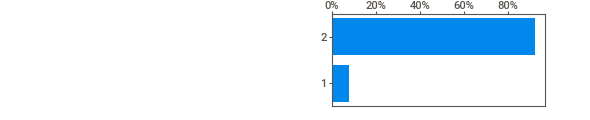
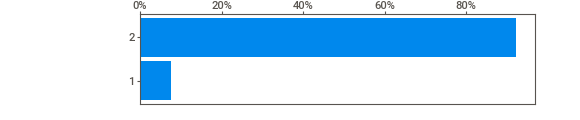
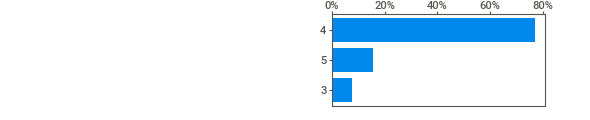
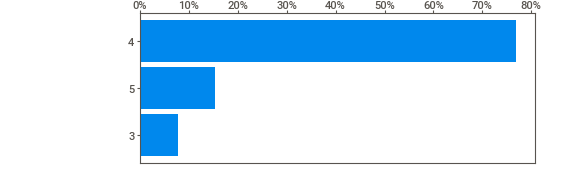
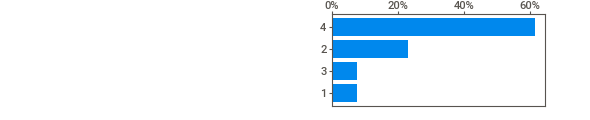
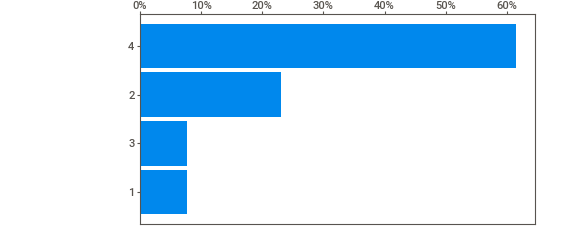
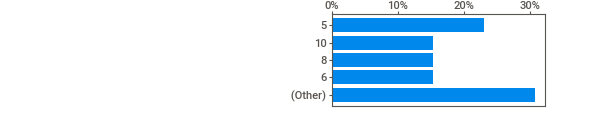
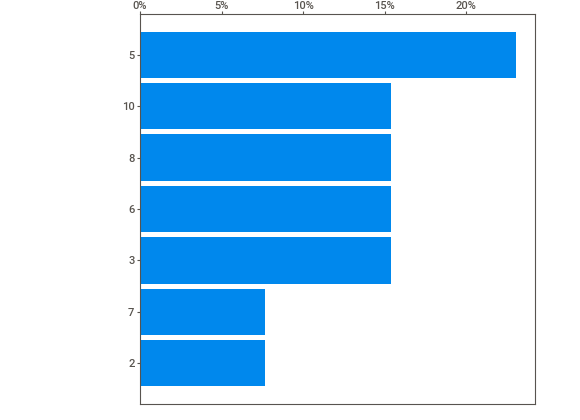
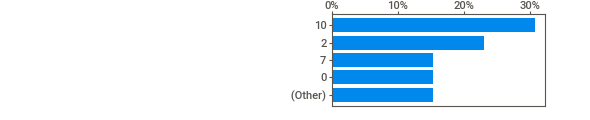
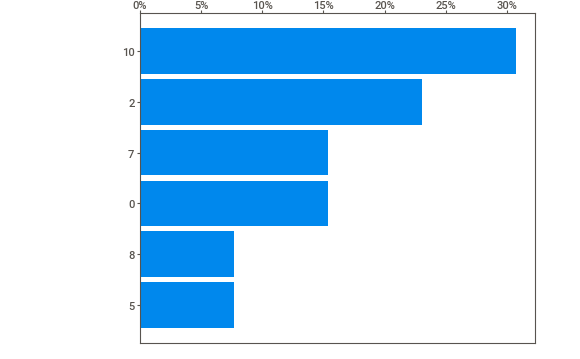
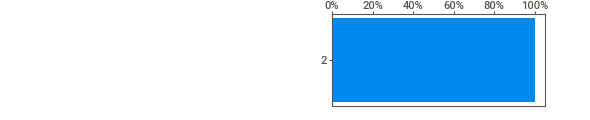
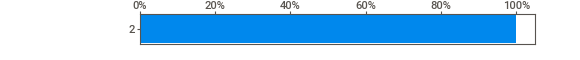
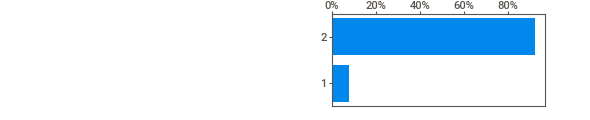
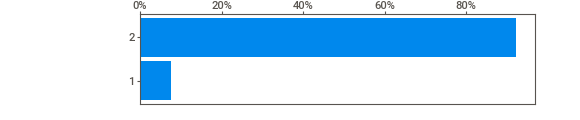
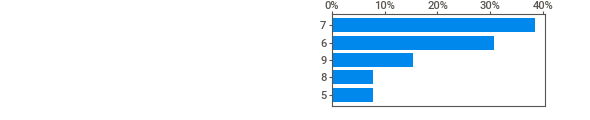
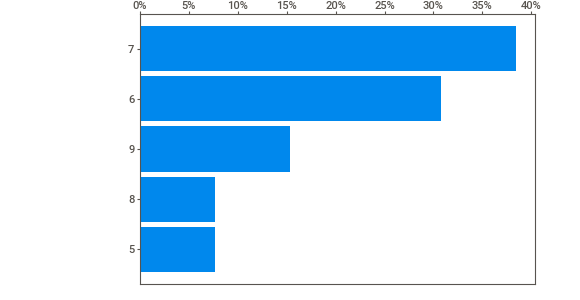
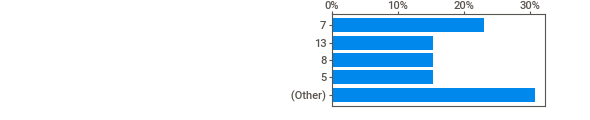
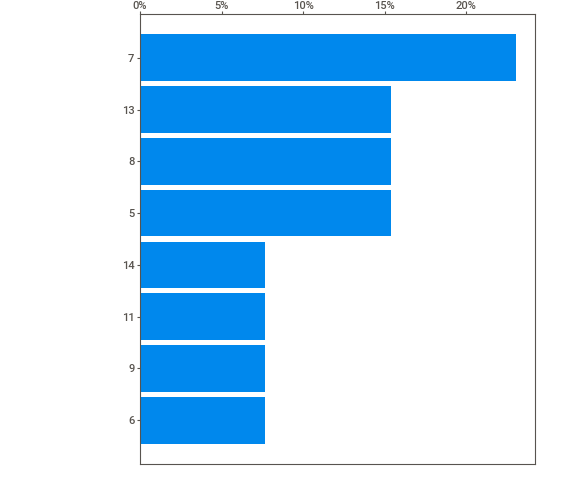
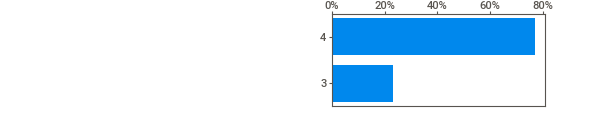
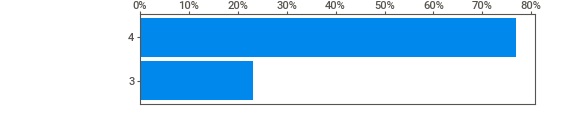
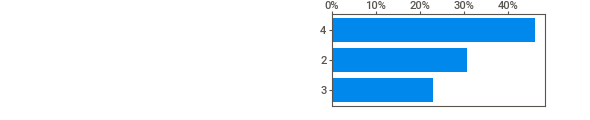
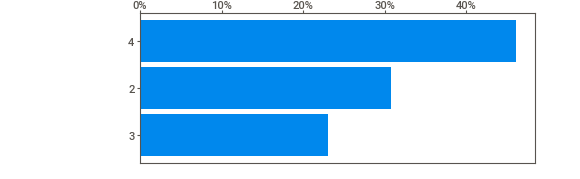
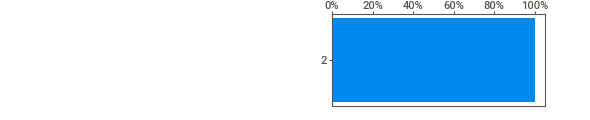
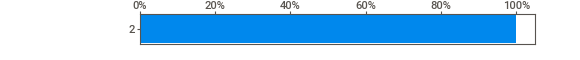
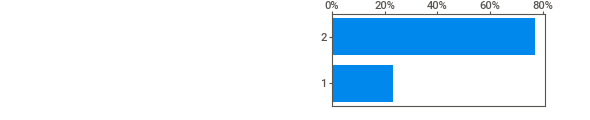
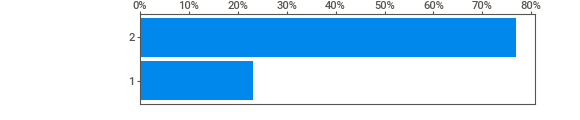
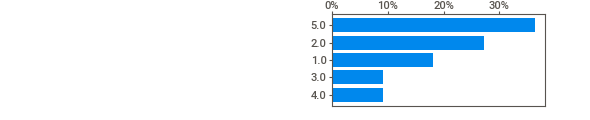
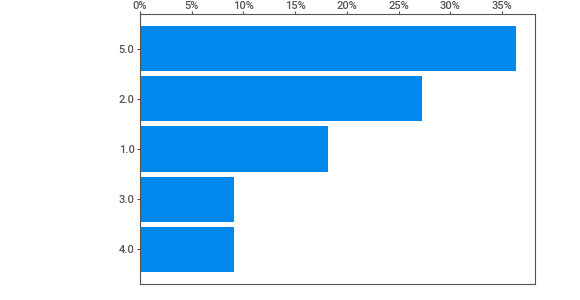
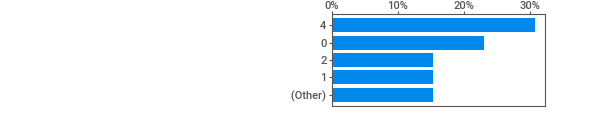
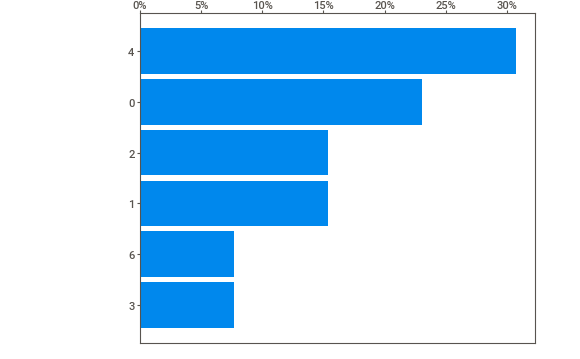
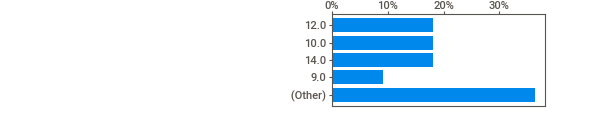
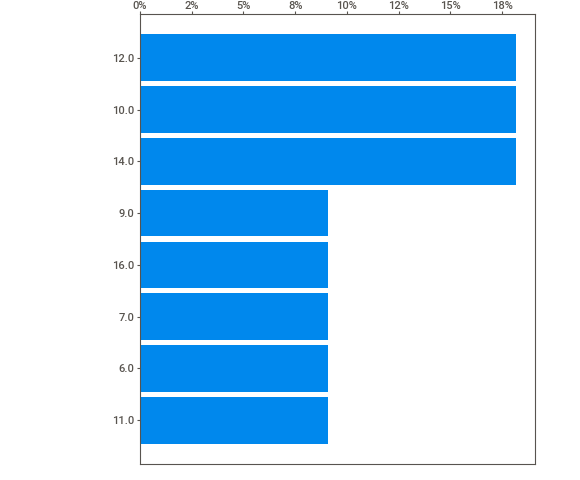
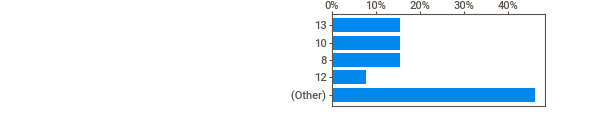
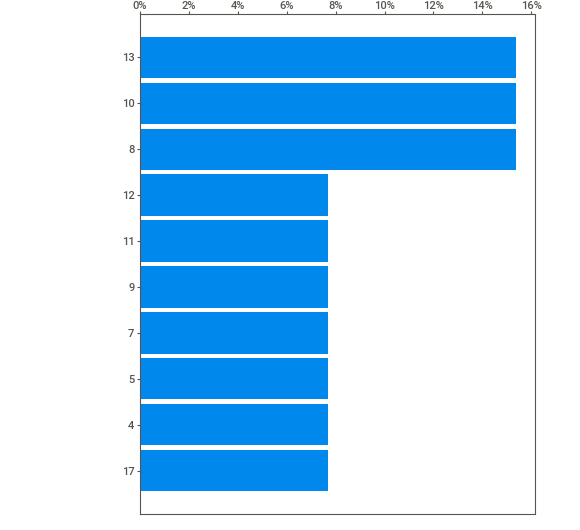
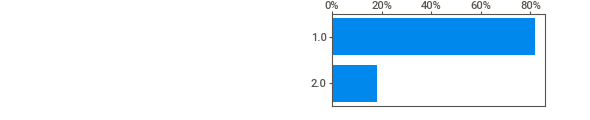
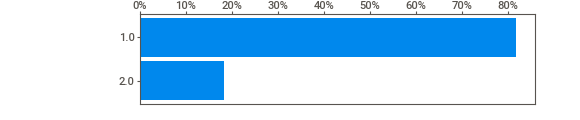
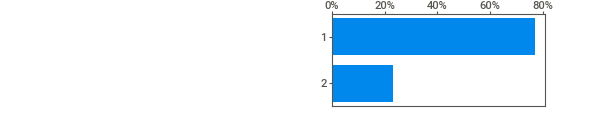
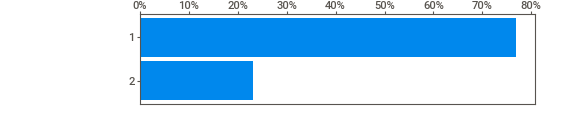
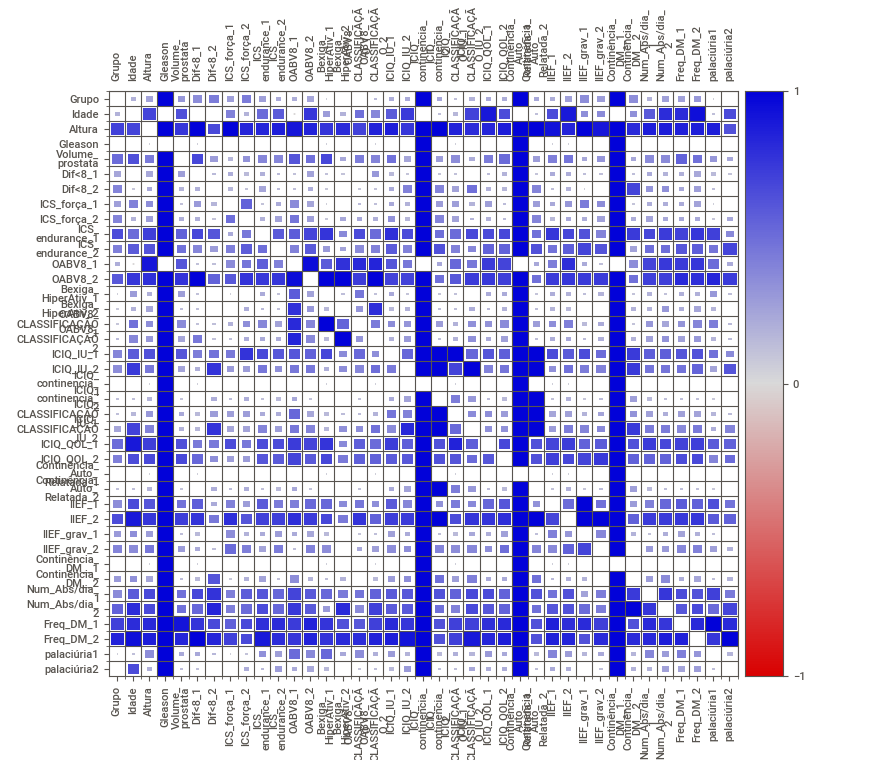
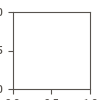

In [ ]:
#Viz EDA
report.show_notebook("Report_SweetViz_Disf_Eret")#, w ="100%", h="100%")#, scale=0.8) #(w="900%", h=300, scale=d1.0)

In [ ]:
#export html page
report.show_html('Report_SweetViz_Disf_Eret_vertical.html',layout='widescreen') #alternative ,layout='vertical')

Report Report_SweetViz_Disf_Eret_vertical.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#export html other view
report.show_html('Report_SweetViz_Disf_Eret_vertical.html',layout='vertical')

Report Report_SweetViz_Disf_Eret_vertical.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Autoviz

Autoviz is an open-source python auto visualization library that mainly focuses on visualizing the relationship of the data by generating different types of plot.

In [ ]:
pip install autoviz

In [ ]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz("DB_DE_F.csv")

File encoding decoder utf-8 does not work for this file
File encoding decoder iso-8859-11 does not work for this file
File encoding decoder cpl252 does not work for this file
File encoding decoder latin1 does not work for this file
None of the decoders work...
Not able to read or load file. Please check your inputs and try again...


### D-Tale

D-Tale is an open-source python auto-visualization library. It is one of the best auto data-visualization libraries. D-Tale helps you to get a detailed EDA of the data. It also has a feature of code export, for every plot or analysis in the report.

In [ ]:
pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
import pandas as pd

dtale_app.USE_NGROK=True #THIS LINE IS ESSENTIAL TO OPERATE AT COLAB

d = dtale.show(df, ignore_duplicate=True)
d

http://2aa7c1e3a87c.ngrok.io/dtale/main/1

[D-tale docs](https://pypi.org/project/dtale/)

[D-tale at colab](https://www.youtube.com/watch?v=pOYl2M1clIw)


## Plots

### Matplotlib

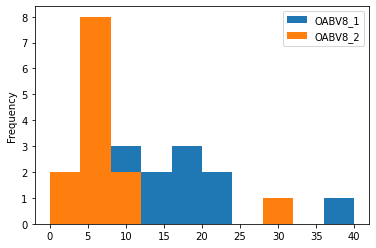

In [ ]:
fig = df[['OABV8_1', 'OABV8_2']].plot(kind='hist')
#fig.write_image('test.png')

### Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

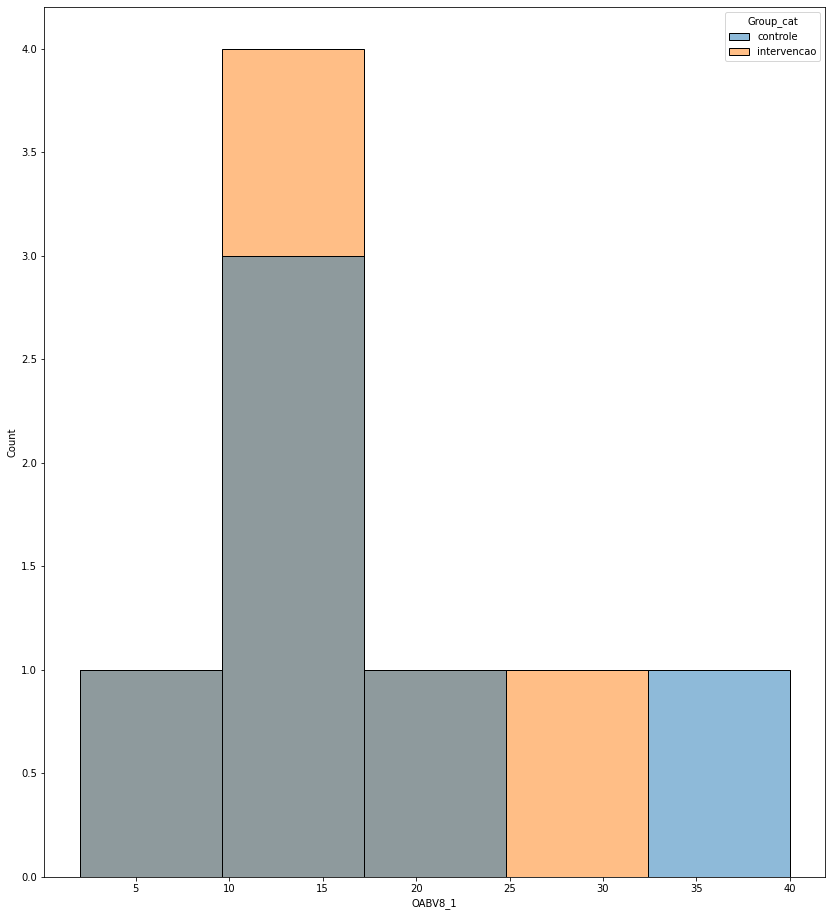

In [ ]:
# Drawing scatter plot using relplot
plt.figure(figsize=(14,16))
sns.histplot(df, x="OABV8_1", hue="Group_cat")#, height=8.5,aspect =1) # ,kind='scatter'
plt.show();

<Figure size 1008x1152 with 0 Axes>

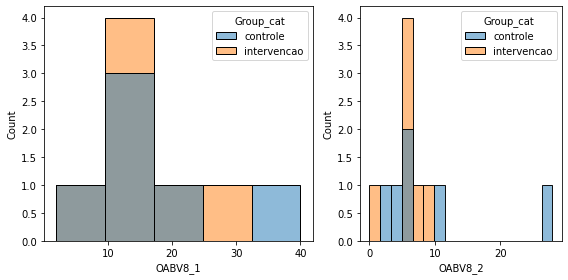

In [ ]:
plt.figure(figsize=(14,16))
f, axs = plt.subplots(1,2,figsize=(8,4),gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(df, x="OABV8_1" , hue="Group_cat",ax=axs[0])
sns.histplot(df, x="OABV8_2" , hue="Group_cat", ax=axs[1]) # ,kind='scatter'
f.tight_layout();
#plt.show();

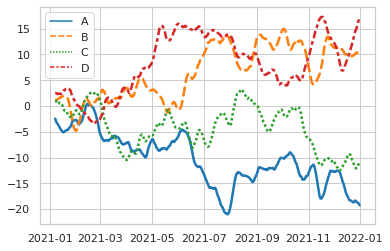

In [ ]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2021", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

### Plotly

PLotly Express

In [ ]:
OAB_Class = px.histogram(df, x="OABV8_rating_1", y="OABV8_rating_2", color="Group")#, marginal="violin", barmode="group",hover_data=df.columns)
OAB_Class.show()


In [ ]:
fig = px.histogram(df, x="ICIQ_rating_IU_1",  color="Group", barmode="group", opacity=0.8)#,
             #facet_col="ICIQ_cat_1")#,
             #facet_row="ICIQ_cat_1",             
#            category_orders={"ICIQ_cat_1": ["severe", "Fri", "Sat", "Sun"],
#                              "time": ["Lunch", "Dinner"]})
fig.show()

In [ ]:
import plotly.express as px
OAB = px.histogram(df, x="OABV8_1", y="OABV8_2", color="Group", marginal="violin", barmode="group", hover_data=df.columns)
OAB.show()

In [ ]:
fig = px.pie(df,
            values='OABV8_rating_2',
            names='OABV8_cat_2',
            color='OABV8_cat_2',
            color_discrete_map={'mild':'cyan',
                                'moderate':'orange',
                                'severe':'red'})
fig.show()

In [ ]:
fig = px.pie(df,
             values='OABV8_rating_1',
             names='OABV8_cat_1',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=.3)#,
             #pull=[0, 0, 0.2])
fig.show()

In [ ]:
fig = px.pie(df,
             values='OABV8_rating_1',
             names='OABV8_cat_1',
             #color_discrete_sequence=px.colors.cyclical.HSV,
             color='OABV8_cat_1',
             color_discrete_sequence=["lightgreen","red","orange"],
             hole=.3,
             title="Overactive Bladder Awareness Tool | OAB-V8" )#,
             #pull=[0, 0, 0])
fig.show()

Plotly Go 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define color sets of paintings

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                            [{'type':'domain'}, {'type':'domain'}]])
#Group1
preOAB1=df.query("Group=='1'")['OABV8_cat_1']

fig.add_trace(go.Pie(labels=preOAB1,
             values=df['OABV8_rating_1'], 
             pull=[0, 0.1, 0]
             ),1,1)

posOAB1=df.query("Group=='1'")['OABV8_cat_2']

fig.add_trace(go.Pie(labels=posOAB1,
             values=df['OABV8_rating_2'],
             pull=[0, 0, 0, 0.1]
             ),1,2)
#Group2
preOAB2=df.query("Group=='2'")['OABV8_cat_1']

fig.add_trace(go.Pie(labels=preOAB2,
             values=df['OABV8_rating_1'], 
             pull=[0, 0.1, 0]
             ),2,1)

posOAB2=df.query("Group=='2'")['OABV8_cat_2']

fig.add_trace(go.Pie(labels=posOAB2,
             values=df['OABV8_rating_2'],
             pull=[0, 0, 0, 0.1]
             ),2,2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5,
                  hoverinfo="label+percent",
                  marker_colors=["lightgreen","red","orange"])

fig.update_layout(
    title_text="Overactive Bladder Awareness Tool | OAB-V8",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Control', x=0.18, y=0.5, font_size=16, showarrow=False),
                 dict(text='Intervention', x=0.87, y=0.5, font_size=16, showarrow=False)])
fig.show()